# Setup and Data

In [3]:
from inflation_analysis import calculate_price_indexes
from tabulate import tabulate
import matplotlib.pyplot as plt

# Parameters
start_year = 2012
end_year = 2022
top_n = 10

data_folder="/Users/roykisluk/Downloads/Consumer_Expenditure_Survey/"
base_year = start_year
years=range(start_year, end_year+1)

combined_df, combined_secondary_df, combined_primary_df, yearly_price_index = calculate_price_indexes(start_year, end_year, base_year, cex_data_folder=data_folder)

Calculating price indexes: 100%|██████████| 11/11 [00:32<00:00,  2.92s/it]


In [4]:
# Number of products in each year
for year in years:
    print(f"Number of products in year: {year}")
    print(combined_df[(combined_df['Year'] == year)]['prodcode'].count())

Number of products in year: 2012
813
Number of products in year: 2013
788
Number of products in year: 2014
785
Number of products in year: 2015
785
Number of products in year: 2016
780
Number of products in year: 2017
767
Number of products in year: 2018
763
Number of products in year: 2019
740
Number of products in year: 2020
711
Number of products in year: 2021
722
Number of products in year: 2022
715


# Output

## Yearly Price Indexes

In [5]:
# Display yearly price index per year in tabulate
print("Yearly Price Index:")
print(tabulate(yearly_price_index.items(), headers=["Year", "Price Index"], tablefmt="grid"))

Yearly Price Index:
+--------+---------------+
|   Year |   Price Index |
+========+===============+
|   2012 |       100     |
+--------+---------------+
|   2013 |       102.704 |
+--------+---------------+
|   2014 |       105.011 |
+--------+---------------+
|   2015 |       106.058 |
+--------+---------------+
|   2016 |       109.33  |
+--------+---------------+
|   2017 |       108.949 |
+--------+---------------+
|   2018 |       106.309 |
+--------+---------------+
|   2019 |       112.98  |
+--------+---------------+
|   2020 |       118.306 |
+--------+---------------+
|   2021 |       121.457 |
+--------+---------------+
|   2022 |       124.8   |
+--------+---------------+


## Top Increases and Decreases

In [6]:
# Plot top and bottom price indexes for each year
df_top_secondary = {}
df_bottom_secondary = {}
df_top_primary = {}
df_bottom_primary = {}
for year in years:
    df_top_secondary[year] = combined_secondary_df[combined_secondary_df['Year'] == year].nlargest(top_n, 'price_index')
    df_bottom_secondary[year] = combined_secondary_df[combined_secondary_df['Year'] == year].nsmallest(top_n, 'price_index')
    df_top_primary[year] = combined_primary_df[combined_primary_df['Year'] == year].nlargest(top_n, 'price_index')
    df_bottom_primary[year] = combined_primary_df[combined_primary_df['Year'] == year].nsmallest(top_n, 'price_index')
    if year != base_year:
        print(f"Year: {year}")
        print("Top price indexes (Secondary):")
        print(tabulate(df_top_secondary[year], headers='keys', tablefmt='psql'))
        print("Bottom price indexes (Secondary):")
        print(tabulate(df_bottom_secondary[year], headers='keys', tablefmt='psql'))
        print("Top price indexes (Primary):")
        print(tabulate(df_top_primary[year], headers='keys', tablefmt='psql'))
        print("Bottom price indexes (Primary):")
        print(tabulate(df_bottom_primary[year], headers='keys', tablefmt='psql'))

Year: 2013
Top price indexes (Secondary):
+-----+--------+------------+---------------+------------+-----------------------------------------+
|     |   Year |   prodcode |   price_index |     weight | description                             |
|-----+--------+------------+---------------+------------+-----------------------------------------|
|  84 |   2013 |        321 |       215.98  | 0.00129227 | Government Taxes                        |
|  89 |   2013 |        333 |       144.728 | 0.0185018  | Home Maintenance And Renovation         |
|  67 |   2013 |        301 |       128.955 | 0.00716347 | Vegetable Oils And Products             |
| 129 |   2013 |        397 |       124.433 | 0.00330996 | Organization Fees And Donations         |
| 123 |   2013 |        391 |       118.31  | 0.0164177  | Cigarettes Tobacco And Smoking Supplies |
|  90 |   2013 |        334 |       114.675 | 0.0134614  | Household Help                          |
|  76 |   2013 |        311 |       113.605 | 0.0

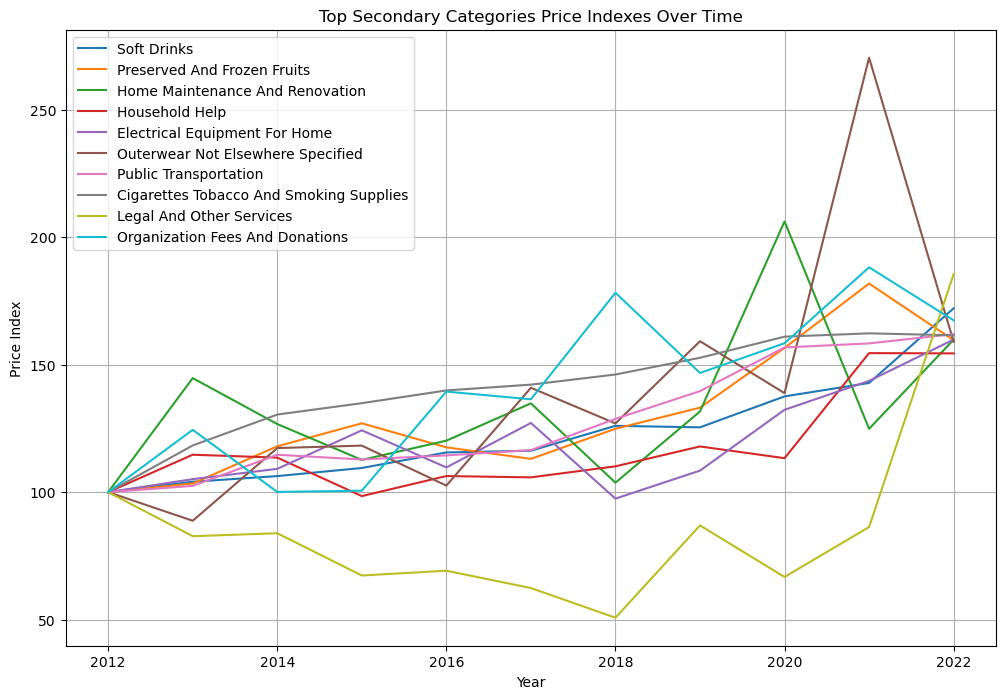

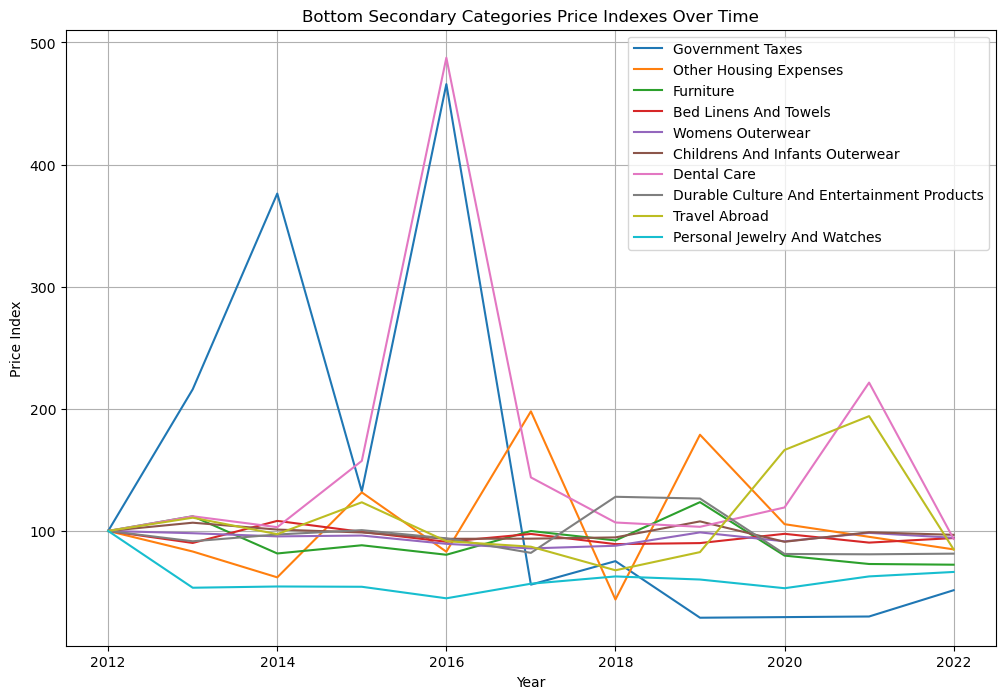

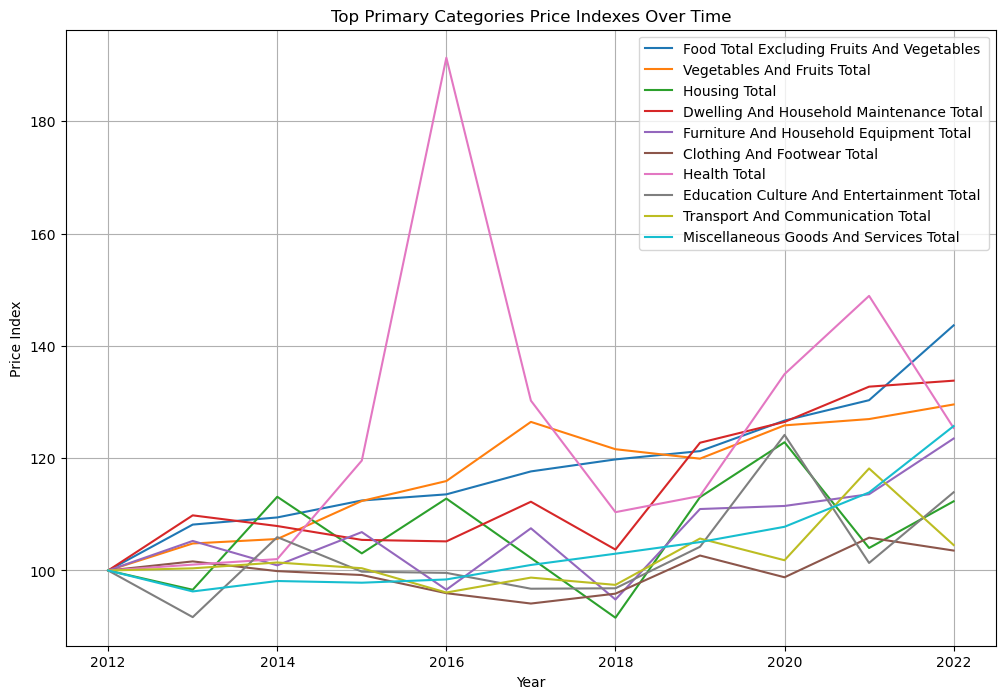

In [7]:
# Extract prodcodes for the last year
last_year = end_year

top_secondary_prodcodes = df_top_secondary[last_year]['prodcode'].unique()
bottom_secondary_prodcodes = df_bottom_secondary[last_year]['prodcode'].unique()
top_primary_prodcodes = df_top_primary[last_year]['prodcode'].unique()
bottom_primary_prodcodes = df_bottom_primary[last_year]['prodcode'].unique()

# Plot top secondary categories price indexes over time
plt.figure(figsize=(12, 8))
filtered_top_secondary_df = combined_secondary_df[combined_secondary_df['prodcode'].isin(top_secondary_prodcodes)]
for prodcode in filtered_top_secondary_df['prodcode'].unique():
    df_prodcode = filtered_top_secondary_df[filtered_top_secondary_df['prodcode'] == prodcode]
    description = df_prodcode['description'].iloc[0] if not df_prodcode['description'].isna().all() else f'Prodcode {prodcode}'
    plt.plot(df_prodcode['Year'], df_prodcode['price_index'], label=description)
plt.xlabel('Year')
plt.ylabel('Price Index')
plt.title('Top Secondary Categories Price Indexes Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot bottom secondary categories price indexes over time
plt.figure(figsize=(12, 8))
filtered_bottom_secondary_df = combined_secondary_df[combined_secondary_df['prodcode'].isin(bottom_secondary_prodcodes)]
for prodcode in filtered_bottom_secondary_df['prodcode'].unique():
    df_prodcode = filtered_bottom_secondary_df[filtered_bottom_secondary_df['prodcode'] == prodcode]
    description = df_prodcode['description'].iloc[0] if not df_prodcode['description'].isna().all() else f'Prodcode {prodcode}'
    plt.plot(df_prodcode['Year'], df_prodcode['price_index'], label=description)
plt.xlabel('Year')
plt.ylabel('Price Index')
plt.title('Bottom Secondary Categories Price Indexes Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot top primary categories price indexes over time
plt.figure(figsize=(12, 8))
filtered_top_primary_df = combined_primary_df[combined_primary_df['prodcode'].isin(top_primary_prodcodes)]
for prodcode in filtered_top_primary_df['prodcode'].unique():
    df_prodcode = filtered_top_primary_df[filtered_top_primary_df['prodcode'] == prodcode]
    description = df_prodcode['description'].iloc[0] if not df_prodcode['description'].isna().all() else f'Prodcode {prodcode}'
    plt.plot(df_prodcode['Year'], df_prodcode['price_index'], label=description)
plt.xlabel('Year')
plt.ylabel('Price Index')
plt.title('Top Primary Categories Price Indexes Over Time')
plt.legend()
plt.grid(True)
plt.show()